In [4]:
import tensorflow as tf

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib # 面向对象的路径管理工具

In [3]:
data_dir = './dataset/2_class'

In [4]:
data_root = pathlib.Path(data_dir)

In [5]:
#对目录进行迭代
for item in data_root.iterdir():
    print(item)

dataset\2_class\airplane
dataset\2_class\lake


In [6]:
# 取出所有路径
all_image_path = list(data_root.glob('*/*')) #正则表达式 list()变为列表

In [7]:
len(all_image_path)

1400

In [8]:
all_image_path[:3] #前三个

[WindowsPath('dataset/2_class/airplane/airplane_001.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_002.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_003.jpg')]

In [9]:
all_image_path[-3:] #后三个

[WindowsPath('dataset/2_class/lake/lake_698.jpg'),
 WindowsPath('dataset/2_class/lake/lake_699.jpg'),
 WindowsPath('dataset/2_class/lake/lake_700.jpg')]

In [10]:
#将WindowsPath变为实际路径：列表推导式
all_image_path = [str(path) for path in all_image_path]

In [11]:
all_image_path[10:12]

['dataset\\2_class\\airplane\\airplane_011.jpg',
 'dataset\\2_class\\airplane\\airplane_012.jpg']

In [12]:
#乱序
import random

In [13]:
random.shuffle(all_image_path)

In [14]:
all_image_path[10:12]

['dataset\\2_class\\airplane\\airplane_631.jpg',
 'dataset\\2_class\\airplane\\airplane_633.jpg']

In [15]:
image_count = len(all_image_path)
image_count

1400

In [16]:
#分类
label_names = sorted(item.name for item in data_root.glob('*/'))# 提取出所有目录的名字 并sorted排序

In [17]:
label_names

['airplane', 'lake']

In [18]:
label_to_index = dict((name, index) for index, name in enumerate(label_names)) #方便引用 所以进行编码

In [19]:
label_to_index

{'airplane': 0, 'lake': 1}

In [20]:
#第二节课5.2

In [21]:
pathlib.Path('dataset\\2_class\\lake\\lake_222.jpg').parent.name

'lake'

In [22]:
# 由文件上一级的目录名称转换成数字编码
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [23]:
all_image_label[:5]

[1, 1, 1, 0, 0]

In [24]:
all_image_path[:5]

['dataset\\2_class\\lake\\lake_616.jpg',
 'dataset\\2_class\\lake\\lake_646.jpg',
 'dataset\\2_class\\lake\\lake_662.jpg',
 'dataset\\2_class\\airplane\\airplane_689.jpg',
 'dataset\\2_class\\airplane\\airplane_378.jpg']

In [25]:
import IPython.display as display

In [26]:
index_to_label =dict( (v, k) for k, v in label_to_index.items())

In [27]:
index_to_label #知道编号可获取实际名称

{0: 'airplane', 1: 'lake'}

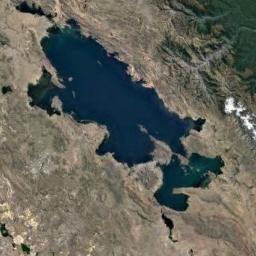

lake


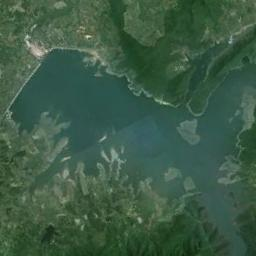

lake


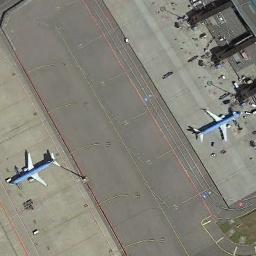

airplane


In [28]:
#随机显示三张图片
for n in range(3):
    image_index =  random.choice(range(len(all_image_path))) #随机抽选的图片
    display.display(display.Image(all_image_path[image_index])) #找到对应的路径
    print(index_to_label[all_image_label[image_index]] ) #显示对应的编号,再转换成对应的文字

In [29]:
img_path = all_image_path[0]

In [30]:
img_path

'dataset\\2_class\\lake\\lake_616.jpg'

In [31]:
#用TensorFlow的tf.io方法读取图片
img_raw = tf.io.read_file(img_path) #读取图片

In [32]:
# 对图片进行解码
img_tensor = tf.image.decode_jpeg(img_raw)

In [33]:
img_tensor.shape

TensorShape([256, 256, 3])

In [34]:
img_tensor.dtype #数据类型

tf.uint8

In [35]:
img_tensor

<tf.Tensor: id=2, shape=(256, 256, 3), dtype=uint8, numpy=
array([[[38, 70, 46],
        [46, 78, 54],
        [55, 87, 63],
        ...,
        [67, 90, 62],
        [70, 95, 66],
        [61, 86, 57]],

       [[40, 72, 48],
        [48, 80, 56],
        [56, 88, 64],
        ...,
        [59, 84, 55],
        [63, 87, 61],
        [58, 84, 55]],

       [[42, 74, 50],
        [49, 81, 57],
        [57, 89, 65],
        ...,
        [44, 70, 43],
        [45, 73, 48],
        [47, 76, 48]],

       ...,

       [[34, 67, 38],
        [35, 68, 39],
        [31, 64, 35],
        ...,
        [41, 69, 46],
        [45, 73, 50],
        [54, 82, 59]],

       [[32, 65, 36],
        [34, 67, 38],
        [32, 65, 36],
        ...,
        [38, 66, 43],
        [42, 67, 45],
        [52, 77, 55]],

       [[32, 65, 36],
        [36, 69, 40],
        [36, 69, 40],
        ...,
        [34, 62, 39],
        [37, 62, 40],
        [47, 72, 50]]], dtype=uint8)>

In [36]:
#第三节课

In [37]:

#转换数据类型
img_tensor = tf.cast(img_tensor, tf.float32)

In [38]:
#对图片标准化归一化 取值0-1之间
img_tensor = img_tensor / 255

In [39]:
img_tensor.numpy()

array([[[0.14901961, 0.27450982, 0.18039216],
        [0.18039216, 0.30588236, 0.21176471],
        [0.21568628, 0.34117648, 0.24705882],
        ...,
        [0.2627451 , 0.3529412 , 0.24313726],
        [0.27450982, 0.37254903, 0.25882354],
        [0.23921569, 0.3372549 , 0.22352941]],

       [[0.15686275, 0.28235295, 0.1882353 ],
        [0.1882353 , 0.3137255 , 0.21960784],
        [0.21960784, 0.34509805, 0.2509804 ],
        ...,
        [0.23137255, 0.32941177, 0.21568628],
        [0.24705882, 0.34117648, 0.23921569],
        [0.22745098, 0.32941177, 0.21568628]],

       [[0.16470589, 0.2901961 , 0.19607843],
        [0.19215687, 0.31764707, 0.22352941],
        [0.22352941, 0.34901962, 0.25490198],
        ...,
        [0.17254902, 0.27450982, 0.16862746],
        [0.1764706 , 0.28627452, 0.1882353 ],
        [0.18431373, 0.29803923, 0.1882353 ]],

       ...,

       [[0.13333334, 0.2627451 , 0.14901961],
        [0.13725491, 0.26666668, 0.15294118],
        [0.12156863, 0

In [40]:
#将以上几步总结成一个函数：读取图片路径，解码图片，转换数据类型，标准化归一化
def load_preprocess_image(path):
    img_raw = tf.io.read_file(path)
    img_tensor = tf.image.decode_jpeg(img_raw, channels=3) #3是彩色图片
    img_tensor = tf.image.resize(img_tensor,[256,256]) #改变图片大小
    img_tensor = tf.cast(img_tensor, tf.float32)
    img = img_tensor / 255
    return img

In [41]:
#引用函数用matplotlib画一张图片
image_path = all_image_path[66]

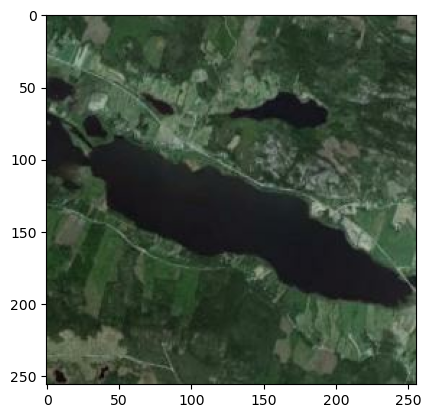

In [42]:
plt.imshow(load_preprocess_image(image_path))

In [43]:
#用all_image_path创建Dataset数据集
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [44]:
#创建Dataset，这个Dataset里的数据都已经归一化处理好了
image_dataset = path_ds.map(load_preprocess_image)

In [45]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [46]:
#用all_image_label(编码)创建Dataset数据集
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)

In [47]:
# 核对编码与图片是否对应
for label in label_dataset.take(10): #前十个label
    print(label)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [48]:
#第四节 5.4

In [49]:
#合并两个Dataset

In [50]:
dataset = tf.data.Dataset.zip((image_dataset, label_dataset)) #以元组方式

In [51]:
dataset#shape是一个元组：256*256的图片和label

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [52]:
#在Dataset中划分训练数据和测试数据

In [53]:
test_count = int(image_count*0.2) #大约选取20%的数据作为测试数据

In [54]:
train_count = image_count - test_count

In [55]:
train_count, test_count

(1120, 280)

In [56]:
train_dataset = dataset.skip(test_count)#跳过测试数据的个数，得到训练数据

In [57]:
test_dataset = dataset.take(test_count) #取测试数据的个数

In [61]:
BATCH_SIZE = 32 #每一次训练32张图片

In [62]:
train_dataset = train_dataset.repeat().shuffle(buffer_size=train_count).batch(BATCH_SIZE) #乱序

In [63]:
test_dataset = test_dataset.batch(BATCH_SIZE) #测试数据不需要乱序

In [66]:
 #第五节 5.5 构造模型

In [75]:
model = tf.keras.Sequential() # 顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3),activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D()) 
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))# 卷积核个数是2的n次方递增的，可以增强拟合能力
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D()) #两层卷积 一层pool
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D()) # 全局平均值化
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu')) 
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #输出层：二分类问题，最后输出为1，激活函数为sigmoid

In [77]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 59, 59, 256)      

In [78]:
model.compile(optimizer='adam', #优化函数
             loss='binary_crossentropy',
             metrics=['acc'] #训练过程中输出正确率
             )

In [79]:
#设定多少步是epoch
steps_per_epoch = train_count // BATCH_SIZE
validation_steps = test_count // BATCH_SIZE

In [83]:
model.fit(train_dataset, epochs = 30, steps_per_epoch=steps_per_epoch, validation_data=test_dataset, validation_steps=validation_steps)

Train for 35 steps, validate for 8 steps
Epoch 1/30
16/35 [============>.................] - ETA: 3:57 - loss: 0.6759 - acc: 0.6000

KeyboardInterrupt: 

In [84]:
history.history.keys() #看一下有哪些参数

NameError: name 'history' is not defined

In [ ]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc') 
#没有过拟合，但正确率有待提高

In [1]:
#第七节 5.7

In [11]:
#添加BN层
model = tf.keras.Sequential() # 顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3))) #这个卷积层没有做激活
model.add(tf.keras.layers.BatchNormalization()) #添加P标准化这一层
model.add(tf.keras.layers.Activation('relu')) #添加激活层 或者可以像之前的课程一样，在Conv2D层添加激活函数

model.add(tf.keras.layers.Conv2D(64, (3, 3)))# 卷积核个数是2的n次方递增的，可以增强拟合能力
model.add(tf.keras.layers.BatchNormalization()) #添加P标准化这一层
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPooling2D()) 
model.add(tf.keras.layers.Conv2D(128, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(128, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPooling2D()) 
model.add(tf.keras.layers.Conv2D(256, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Conv2D(256, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPooling2D()) 
model.add(tf.keras.layers.Conv2D(512, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPooling2D()) 
model.add(tf.keras.layers.Conv2D(512, (3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.MaxPooling2D()) 
model.add(tf.keras.layers.Conv2D(1024, (3,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 254, 254, 64)      1792      
_________________________________________________________________
batch_normalization_27 (Batc (None, 254, 254, 64)      256       
_________________________________________________________________
activation_27 (Activation)   (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 252, 252, 64)      36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 252, 252, 64)      256       
_________________________________________________________________
activation_28 (Activation)   (None, 252, 252, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 126, 126, 64)     